<a href="https://colab.research.google.com/github/Sank3t-Pand3y/MachineLearning_Projects/blob/main/Back_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## We will initialize the network parameters.

In [6]:
def initialize_network_parameters():
  # Network parameters
  inputSize = 2   ## The number of input neurons (x1, x2)
  hiddenSize = 2  ## The number of hidden neurons
  outputSize = 1  ## Number of output neurons
  lr = 0.001  ## This is the learning rate
  epochs = 1000000  ## Number of training epochs

  ## Initialize weights and biases randomly
  w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1 ## Weights from the input to hidden layer\
  b1 = np.random.rand(hiddenSize, 1) * 2 - 1 # bias for hidden layer
  w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 ## Weights from hidden layer
  b2 = np.random.rand(outputSize, 1) * 2 - 1 ## Bias for output layer

  return w1, b1, w2, b2, lr, epochs

## Implement the backpropagation for AND Problem using similar input as used for XOR problem and plot the error.


Final output after training: [[0.00116289 0.02584368 0.0248912  0.96205383]]
Ground truth [0 0 0 1]
Error after training: [[-0.00116289 -0.0258437  -0.02489121  0.0379462 ]]
Average error: 0.02246


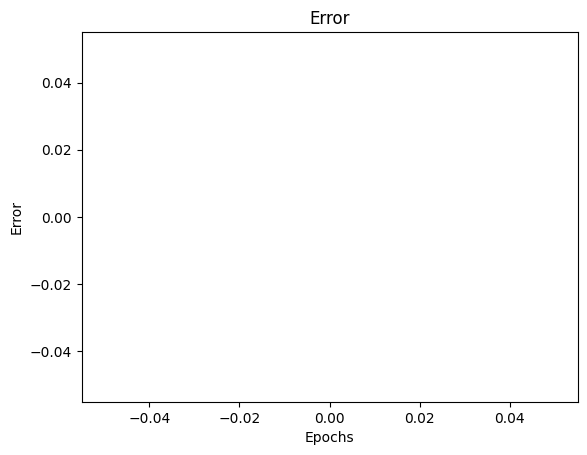

In [8]:
# Write your code here
X = np.array([[0,0], [0,1],[1,0],[1,1]]).T ## This is thee 2*4 matrix, each column is a training example i.e (2,4) 2 inputs and 4 features
d = np.array([0,0,0,1]) ## Expected Output for AND

## Get the initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

## Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1 # This is the weighted sum for hidden layer
    a1 = 1/(1 + np.exp(-z1)) # This is the Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2 ## The weighted sum for output layer
    a2 = 1/ (1+np.exp(-z2)) ## The Sigmoid activation function for output layer

    ## Error Calculation and back propagation
    error = d - a2 ## The difference between the expected output and actual output
    da2 = error * (a2  * (1-a2)) ## Derivative fot the output layer
    dz2 = da2 ## Gradient for the output layer

    ## Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2) ## Gradient for hidden layer\
    dz1 = da1 * (a1 * (1 - a1)) ## Derivative for hidden layer

    ## Update the weights and biases
    w2 += lr * np.dot(dz2, a1.T) ## Update weights from hidden to output layer
    b2 += lr * np.sum(dz2 , axis =1, keepdims = True) # Derivative fot hidden layer

    w1 += lr * np.dot(dz1, X.T)  ## Update the weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims = True) #Update the bias for hidden layer
    if (epoch + 1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

## Testing the Trained Network
z1 = np.dot(w1, X) + b1  ## Weighted Sum for hidden layer
a1 = 1 / (1 + np.exp(-z1)) ## Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2 ## Weighted Sum for Output layer
a2 = 1 / (1 + np.exp(-z2)) ## Sigmoid activation for the output layer


## Print The Result
print('\nFinal Output after Training is :', a2)
print('Ground Truth', d)
print('Error after training is :', error)
print('Average error is : %0.05f'%np.average(abs(error)))


## Plot the error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()